# Visualize MSH simulated depth through space and time

In [1]:
import os
import sys
import subprocess

# logic to accomodate Google Colab
try:
    import google.colab

    ENV_IS_CL = True
    root = r"/content/t-route"
    subprocess.run(
        [
            "git",
            "clone",
            "-b",
            "msh-depth-viz",
            "https://github.com/awlostowski-noaa/t-route.git",
        ]
    )

    # change current working directory to /notebooks
    os.chdir("/content/t-route/notebooks")
    
except:
    ENV_IS_CL = False
    root = os.path.dirname(os.path.abspath(""))

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
# import MSH output data
data = pd.read_csv('../test/output/msh_test_result.csv')

# rename columns to something more intuitive
data = data.rename(columns={"n+ (time)": "time",
                             "I (segment)": "seg",
                             "j (reach)": "reach",
                             "adjusted & accum. Length": "Length",
                             "depth + z [m]": "depth_el",
                             "depth [m]": "depth",
                             "z (channel bottom elev) [m]": "btm_el",
                             "Q [cms]": "flow"})

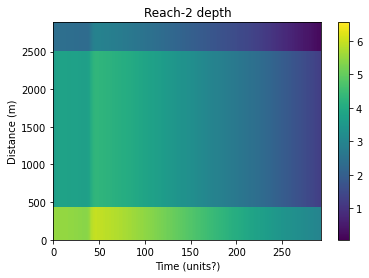

In [3]:
def msh_viz_grid(data, parameter, reach, scaling):
    
    df = data[data.reach == reach]

    nrows = len(np.unique(df.seg))
    ncols = len(np.unique(df.time))

    Z = np.empty([nrows,ncols])

    for i in range(1,nrows+1):
        Z[i-1,:] = df[df.seg == i].loc[:,parameter]

    x = [0]+list(np.unique(df.time)) # time

    if reach == 3:
        y = [data[data.reach == 1].Length.max()] + list(np.unique(df.Length)) # space
    else: 
        y = [0] + list(np.unique(df.Length)) # space

    fig, ax = plt.subplots()
    if scaling == "global":
        vmin=data.loc[:,parameter].min()
        vmax=data.loc[:,parameter].max()
    if scaling == "local":
        vmin=df.loc[:,parameter].min()
        vmax=df.loc[:,parameter].max()
        
    im = ax.pcolormesh(x, y, Z, shading='flat', vmin=vmin, vmax=vmax)

    X, Y = np.meshgrid(x, y)
    ax.set_title("Reach-" + str(reach) + " " + parameter)
    plt.ylabel("Distance (m)")
    plt.xlabel("Time (units?)")
    fig.colorbar(im, ax=ax)

    plt.show()

    
# call function above
'''
function inputs:
parameter (str): the column title of the parameter you would like to visualize, must match exactly
reach (int): the reach number you would like to visualize
scaling (str): if "global", colorbar is scaled between network min and max; 
               if "local" clorbar is scaled between reach min and max
'''
msh_viz_grid(data, parameter = "depth", reach = 2, scaling = "global")

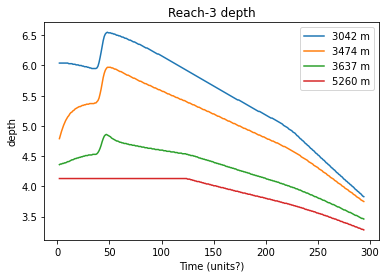

In [4]:
def msh_viz_lines(data, reach, parameter):

    df = data[data.reach == reach]

    fig, ax = plt.subplots()

    for key, grp in df.groupby(['Length']):
        ax = grp.plot(ax=ax, kind='line', x='time', y=parameter, label=str(key) + " m")

    ax.set_title("Reach-" + str(reach) + " " + parameter)
    plt.ylabel(parameter)
    plt.xlabel("Time (units?)")
    
    plt.show()

# call function above
'''
function inputs:
parameter (str): the column title of the parameter you would like to visualize, must match exactly
reach (int): the reach number you would like to visualize
'''
msh_viz_lines(data, parameter = "depth", reach = 3)